# Part I - Loan Data Exploration
## by Yusuff O. Olaniyi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#assessing">Data Assessing and Cleaning</a></li>
<li><a href="#exploratory">Exploratory Data Analysis</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>



<a id='Intro'></a>
## Introduction
>In this part of the project, I will conduct an exploratory data analysis of the Prosper Loan Data. I will explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis will go from simple univariate relationships up through multivariate relationships.

> The dataset contains about 114,000 loans with 81 variables on each loan, which include loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data shape and composition
prosper.shape

(113937, 81)

In [4]:
# general overview of the dataset
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# check some samples  of the dataset
prosper.sample(5)

ListingKey  ListingNumber            ListingCreationDate  \
86397  432635523590523533079BC         607774  2012-07-05 09:31:35.217000000   
81854  D0A5359636666134434FE71        1037500  2013-12-08 20:54:11.327000000   
58384  194C35962774972240B05AC        1015630  2013-11-28 08:03:08.017000000   
59536  24233602457334103D8F1F7        1223985  2014-02-20 14:49:34.357000000   
83363  507F3600056651740D7A94B        1103350  2014-01-12 17:55:54.390000000   

      CreditGrade  Term             LoanStatus ClosedDate  BorrowerAPR  \
86397         NaN    60                Current        NaN      0.28704   
81854         NaN    36  Past Due (31-60 days)        NaN      0.32446   
58384         NaN    36                Current        NaN      0.20933   
59536         NaN    36                Current        NaN      0.12727   
83363         NaN    36                Current        NaN      0.12081   

       BorrowerRate  LenderYield    ...     LP_ServiceFees  LP_CollectionFees  \
86397        0.2610       0.2510    ...             -58.24                0.0   
81854        0.2850       0.2750    ...               0.00               -5.1   
58384        0.1725       0.1625    ...             -10.42                0.0   
59536        0.0990       0.0890    ...               0.00                0.0   
83363        0.0930       0.0830    ...             -16.99                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
86397                    0.0                  0.0   
81854                    0.0                  0.0   
58384                    0.0                  0.0   
59536                    0.0                  0.0   
83363                    0.0                  0.0   

      LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
86397                             0.0            1.0                0   
81854                             0.0            1.0                0   
58384                             0.0            1.0                0   
59536                             0.0            1.0                0   
83363                             0.0            1.0                0   

      InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
86397                          0                         0.0        48  
81854                          0                         0.0         1  
58384                          0                         0.0        17  
59536                          0                         0.0         1  
83363                          0                         0.0         1  

[5 rows x 81 columns]

LoanOriginationDate	and ListingCreationDate seem to less than a month

In [6]:
# comparing LoanOriginationDate and ListingCreationDate
prosper[['LoanOriginationDate', 'ListingCreationDate']].head()

LoanOriginationDate            ListingCreationDate
0  2007-09-12 00:00:00  2007-08-26 19:09:29.263000000
1  2014-03-03 00:00:00  2014-02-27 08:28:07.900000000
2  2007-01-17 00:00:00  2007-01-05 15:00:47.090000000
3  2012-11-01 00:00:00  2012-10-22 11:02:35.010000000
4  2013-09-20 00:00:00  2013-09-14 18:38:39.097000000

<a id='assessing'></a>
## Data Assessing and Cleaning
In this section, I will assess the dataset and fix neccessary issues

In [7]:
#checking for consistency between CreditScoreRangeUpper and CreditScoreRangeLower
prosper[['CreditScoreRangeUpper','CreditScoreRangeLower']].sample(10)

CreditScoreRangeUpper  CreditScoreRangeLower
53077                   659.0                  640.0
53177                   699.0                  680.0
41813                   699.0                  680.0
102694                  679.0                  660.0
19617                   679.0                  660.0
79308                   759.0                  740.0
110361                  739.0                  720.0
27150                   659.0                  640.0
104853                  739.0                  720.0
76836                   719.0                  700.0

In [8]:
prosper['CreditScoreRangeUpper'].max()

899.0

Since the difference between *CreditScoreRangeUpper* and *CreditScoreRangeLower* is 19, I will go with just one of them

In [9]:
# Select only columns of interest.
cols = ['LoanOriginalAmount','BorrowerAPR','BorrowerRate','DebtToIncomeRatio','StatedMonthlyIncome','CreditScoreRangeUpper',
        'Term','ListingCategory (numeric)', 'BorrowerState', 'LoanOriginationDate', 'LoanOriginationQuarter','Occupation',
        'EmploymentStatus','MonthlyLoanPayment','Investors','InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
        'Recommendations','IsBorrowerHomeowner']
prosper = prosper[cols]

In [10]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
LoanOriginalAmount             113937 non-null int64
BorrowerAPR                    113912 non-null float64
BorrowerRate                   113937 non-null float64
DebtToIncomeRatio              105383 non-null float64
StatedMonthlyIncome            113937 non-null float64
CreditScoreRangeUpper          113346 non-null float64
Term                           113937 non-null int64
ListingCategory (numeric)      113937 non-null int64
BorrowerState                  108422 non-null object
LoanOriginationDate            113937 non-null object
LoanOriginationQuarter         113937 non-null object
Occupation                     110349 non-null object
EmploymentStatus               111682 non-null object
MonthlyLoanPayment             113937 non-null float64
Investors                      113937 non-null int64
InvestmentFromFriendsCount     113937 non-null int64
InvestmentFromFriendsAmo

In [11]:
# Drop rows with missing BorrowerAPR and CreditScoreRangeUpper
prosper = prosper[prosper['BorrowerAPR'].notnull()]
prosper = prosper[prosper['CreditScoreRangeUpper'].notnull()]

In [12]:
# check for duplicated entries
prosper.duplicated().sum()

871

In [13]:
# drop duplicates in the dataset
prosper = prosper.drop_duplicates()

In [14]:
# Test for confirmation
prosper.duplicated().sum()

0

In [15]:
# filling missing values in the Occupation and BorrowerState as NotAvailable
prosper.Occupation = prosper.Occupation.fillna('NotAvailable')
prosper.BorrowerState = prosper.BorrowerState.fillna('NotAvailable')

In [16]:
# check the values of EmploymentStatus
prosper.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5345
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [17]:
# using the .replace method to change all 'Full-time' EmploymentStatus to 'Employed' and 
# filling missing values with 'Not available'

prosper.EmploymentStatus.replace('Full-time', value='Employed', inplace=True)
prosper.EmploymentStatus = prosper.EmploymentStatus.fillna('Not available')

In [18]:
# test for confirmation
prosper.EmploymentStatus.value_counts()

Employed         92952
Not available     7011
Self-employed     6052
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [19]:
# Splitting LoanOriginationQuarter column into Quarter and Year. Also, extracting Month from ListCreationDate
prosper['Month'] = prosper['LoanOriginationDate'].apply(lambda x: x.split("-")[1]).astype(str)
prosper['Quarter'] = prosper['LoanOriginationQuarter'].apply(lambda x: x.split(" ")[0]).astype(str)
prosper['Year'] = prosper['LoanOriginationQuarter'].apply(lambda x: x.split(" ")[1]).astype(str)

In [20]:
# unique values of Year
prosper.Year.unique()

array(['2007', '2014', '2012', '2013', '2006', '2010', '2011', '2008',
       '2009'], dtype=object)

In [21]:
# unique values of Quarter
prosper.Quarter.unique()

array(['Q3', 'Q1', 'Q4', 'Q2'], dtype=object)

In [22]:
# unique values of Month
prosper.Month.unique()

array(['09', '03', '01', '11', '12', '04', '05', '10', '07', '08', '02',
       '06'], dtype=object)

In [23]:
# replacing numerical values of Month with names
prosper.Month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],
                      ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], inplace = True)

In [24]:
# testing
prosper.Month.unique()

array(['Sept', 'Mar', 'Jan', 'Nov', 'Dec', 'Apr', 'May', 'Oct', 'Jul',
       'Aug', 'Feb', 'Jun'], dtype=object)

In [25]:
# filling missing values in DebtToIncomeRatio column with its mean
prosper.DebtToIncomeRatio = prosper.DebtToIncomeRatio.fillna(prosper.DebtToIncomeRatio.mean())

In [26]:
# create ListingCategory column and assign actual value to the numerical values
conditions = [(prosper['ListingCategory (numeric)'] == 0), (prosper['ListingCategory (numeric)'] == 1), (prosper['ListingCategory (numeric)'] == 2),
             (prosper['ListingCategory (numeric)'] == 3), (prosper['ListingCategory (numeric)'] == 4), (prosper['ListingCategory (numeric)'] == 5),
             (prosper['ListingCategory (numeric)'] == 6), (prosper['ListingCategory (numeric)'] == 7), (prosper['ListingCategory (numeric)'] == 8),
             (prosper['ListingCategory (numeric)'] == 9), (prosper['ListingCategory (numeric)'] == 10), (prosper['ListingCategory (numeric)'] == 11),
             (prosper['ListingCategory (numeric)'] == 12), (prosper['ListingCategory (numeric)'] == 13), (prosper['ListingCategory (numeric)'] == 14),
             (prosper['ListingCategory (numeric)'] == 15), (prosper['ListingCategory (numeric)'] == 16), (prosper['ListingCategory (numeric)'] == 17),
             (prosper['ListingCategory (numeric)'] == 18), (prosper['ListingCategory (numeric)'] == 19), (prosper['ListingCategory (numeric)'] == 20)]
values = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other',
          'Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases',
          'Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']

prosper['ListingCategory'] = np.select(conditions, values)

In [27]:
# Testing
prosper['ListingCategory'].value_counts()

Debt Consolidation    57624
Not Available         16374
Other                 10448
Home Improvement       7388
Business               7157
Auto                   2568
Personal Loan          2395
Household Expenses     1987
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           762
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategory, dtype: int64

The FICO Score , which is the most widely used cerdit scoring model, falls in a range that goes up to 850. The lowest credit score in this range is 300.

In [28]:
# check for Credit Score less than 300
prosper[prosper['CreditScoreRangeUpper'] < 300].count()

LoanOriginalAmount             133
BorrowerAPR                    133
BorrowerRate                   133
DebtToIncomeRatio              133
StatedMonthlyIncome            133
CreditScoreRangeUpper          133
Term                           133
ListingCategory (numeric)      133
BorrowerState                  133
LoanOriginationDate            133
LoanOriginationQuarter         133
Occupation                     133
EmploymentStatus               133
MonthlyLoanPayment             133
Investors                      133
InvestmentFromFriendsCount     133
InvestmentFromFriendsAmount    133
Recommendations                133
IsBorrowerHomeowner            133
Month                          133
Quarter                        133
Year                           133
ListingCategory                133
dtype: int64

In [29]:
# drop all rows with credit score less than 300
prosper = prosper[prosper['CreditScoreRangeUpper'] >= 300]

According to FICO  Score, 300 - 579 is poor, 580 - 669 is fair, 670 - 739 is good, 740 - 799 is very good while above 800 is excellent

In [30]:
# create CreditScore column and assign grades to the numerical values
scores = [(prosper['CreditScoreRangeUpper'] >= 300) & (prosper['CreditScoreRangeUpper'] < 580),
          (prosper['CreditScoreRangeUpper'] >= 580) & (prosper['CreditScoreRangeUpper'] < 670), 
          (prosper['CreditScoreRangeUpper'] >= 670) & (prosper['CreditScoreRangeUpper'] < 740), 
          (prosper['CreditScoreRangeUpper'] >= 740) & (prosper['CreditScoreRangeUpper'] < 800),
          (prosper['CreditScoreRangeUpper'] >= 800)]
grades = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

prosper['CreditScore'] = np.select(scores, grades)

In [31]:
# convert EmploymentStatus, Year, Quarter, Month and CreditScore into ordered categorical types
ordinal_var_dict = {'EmploymentStatus': ['Self-employed','Employed','Part-time','Retired','Other','Not employed','Not available'],
                    'Year': ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
                    'Quarter': ['Q1', 'Q2', 'Q3','Q4'],
                    'Month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],
                    'CreditScore': ['Poor','Fair','Good','Very good','Excellent']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

In [32]:
# count values
prosper['CreditScore'].value_counts()

Good         60604
Fair         20997
Very good    20384
Poor          5507
Excellent     4850
Name: CreditScore, dtype: int64

In [33]:
# drop the columns that are no more required for the analysis
prosper.drop(['LoanOriginationQuarter', 'ListingCategory (numeric)', 'CreditScoreRangeUpper'], axis=1,  inplace = True)

<a id='exploratory'></a>
## Exploratory Data Analysis
> In this section, I will explore the dataset by creating visualizations.

First, let's check some properties of the dataset

In [34]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112342 entries, 0 to 113936
Data columns (total 21 columns):
LoanOriginalAmount             112342 non-null int64
BorrowerAPR                    112342 non-null float64
BorrowerRate                   112342 non-null float64
DebtToIncomeRatio              112342 non-null float64
StatedMonthlyIncome            112342 non-null float64
Term                           112342 non-null int64
BorrowerState                  112342 non-null object
LoanOriginationDate            112342 non-null object
Occupation                     112342 non-null object
EmploymentStatus               112342 non-null category
MonthlyLoanPayment             112342 non-null float64
Investors                      112342 non-null int64
InvestmentFromFriendsCount     112342 non-null int64
InvestmentFromFriendsAmount    112342 non-null float64
Recommendations                112342 non-null int64
IsBorrowerHomeowner            112342 non-null bool
Month                   

In [35]:
prosper.shape

(112342, 21)

In [36]:
prosper.describe()

LoanOriginalAmount    BorrowerAPR   BorrowerRate  DebtToIncomeRatio  \
count       112342.000000  112342.000000  112342.000000      112342.000000   
mean          8339.122581       0.219160       0.193042           0.276880   
std           6241.253429       0.080427       0.074842           0.533824   
min           1000.000000       0.006530       0.000000           0.000000   
25%           4000.000000       0.156290       0.134600           0.150000   
50%           6500.000000       0.210250       0.184000           0.230000   
75%          12000.000000       0.284440       0.250600           0.310000   
max          35000.000000       0.423950       0.360000          10.010000   

       StatedMonthlyIncome           Term  MonthlyLoanPayment      Investors  \
count         1.123420e+05  112342.000000       112342.000000  112342.000000   
mean          5.606525e+03      40.831105          272.677376      81.160278   
std           7.507887e+03      10.447896          192.624468     103.577160   
min           0.000000e+00      12.000000            0.000000       1.000000   
25%           3.206688e+03      36.000000          131.795000       2.000000   
50%           4.666667e+03      36.000000          218.150000      44.000000   
75%           6.832792e+03      36.000000          371.580000     116.000000   
max           1.750003e+06      60.000000         2251.510000    1189.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount  \
count               112342.000000                112342.000000   
mean                     0.023793                    16.785734   
std                      0.234039                   296.622359   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                     33.000000                 25000.000000   

       Recommendations  
count    112342.000000  
mean          0.048691  
std           0.334630  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max          39.000000

In [37]:
prosper.sample(10)

LoanOriginalAmount  BorrowerAPR  BorrowerRate  DebtToIncomeRatio  \
54721                10000      0.23438        0.1970               0.13   
38667                 2000      0.07620        0.0629               0.12   
11952                15000      0.20462        0.1679               0.54   
38683                15000      0.12691        0.0990               0.22   
1365                 10000      0.28974        0.2511               0.23   
62638                 3500      0.23498        0.2200               0.58   
95889                 3000      0.35797        0.3177               0.25   
105844               15000      0.27322        0.2499               0.27   
4317                  8000      0.18275        0.1465               0.18   
30632                 4000      0.24682        0.2218               0.08   

        StatedMonthlyIncome  Term BorrowerState  LoanOriginationDate  \
54721           4583.333333    36            CA  2014-01-28 00:00:00   
38667           3500.000000    36            FL  2013-12-10 00:00:00   
11952           6666.666667    36            NY  2012-10-10 00:00:00   
38683           4833.333333    36            SC  2013-12-23 00:00:00   
1365            6383.333333    36            GA  2011-12-15 00:00:00   
62638           4186.166667    36            GA  2007-07-17 00:00:00   
95889           4425.166667    36            RI  2012-09-14 00:00:00   
105844          9166.666667    60            OH  2011-05-03 00:00:00   
4317            9354.083333    36            CA  2014-02-10 00:00:00   
30632           3383.333333    60            AL  2012-08-03 00:00:00   

                      Occupation EmploymentStatus     ...      Investors  \
54721                      Other         Employed     ...              1   
38667                      Other         Employed     ...              1   
11952   Administrative Assistant         Employed     ...            228   
38683                    Teacher         Employed     ...            203   
1365                Truck Driver         Employed     ...             12   
62638                    Teacher         Employed     ...             70   
95889             Postal Service         Employed     ...             33   
105844       Computer Programmer         Employed     ...            156   
4317       Engineer - Mechanical         Employed     ...              1   
30632             Accountant/CPA         Employed     ...             68   

        InvestmentFromFriendsCount  InvestmentFromFriendsAmount  \
54721                            0                          0.0   
38667                            0                          0.0   
11952                            0                          0.0   
38683                            0                          0.0   
1365                             0                          0.0   
62638                            0                          0.0   
95889                            0                          0.0   
105844                           0                          0.0   
4317                             0                          0.0   
30632                            0                          0.0   

        Recommendations  IsBorrowerHomeowner  Month Quarter  Year  \
54721                 0                 True    Jan      Q1  2014   
38667                 0                False    Dec      Q4  2013   
11952                 0                False    Oct      Q4  2012   
38683                 0                 True    Dec      Q4  2013   
1365                  0                False    Dec      Q4  2011   
62638                 0                 True    Jul      Q3  2007   
95889                 0                 True   Sept      Q3  2012   
105844                0                 True    May      Q2  2011   
4317                  0                False    Feb      Q1  2014   
30632                 0                 True    Aug      Q3  2012   

           ListingCategory CreditScore  
54

### What is the structure of your dataset?

> There are 112,342 loan data in the dataset with 21 features, some of which are categorical such as ListingCategory, BorrowerState, Occupation and so on, while others are numerical/quantitative.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in deteriming which factor(s) contribute to making a good FICO (Credit) score which might in turn determines the assessibilty and amount of loan from ProsperLoan.

> I will also like to check for what category of people take most loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that a borrower with higher income should have a good Credit score and have access to higher amount of loan. Also, the purpose of the loan should be a determining factor whether the loan will be granted or not.

<a id='univariate'></a>
## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If
there is any unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables.

I will start with the distribution of the loan amount

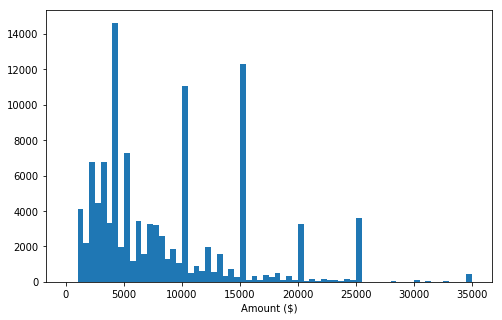

In [38]:
binsize = 500
bins = np.arange(0, prosper['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Amount ($)')
plt.show()

To get a clearer picture, I will like to use the log plot of the LoanOriginalAmount

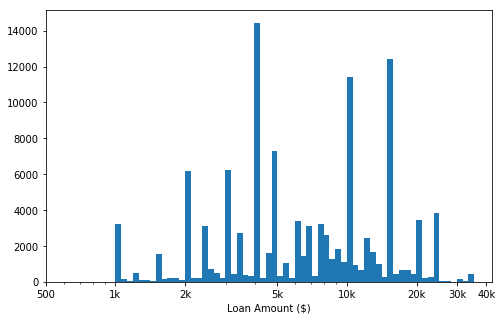

In [39]:
log_binsize = 0.025
bins = 10 ** np.arange(3.0, np.log10(prosper['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k'])
plt.xlabel('Loan Amount ($)')
plt.show()

The two charts show that the loan amount ranges from 1,000 to 35,000 with 4,000 being the most popular followed by 15,000 and 10,000. More than 6,000 people also borrowed 2,000, 4,000 and 5,000.

Now to the Monthly Loan Payment of the borrowers

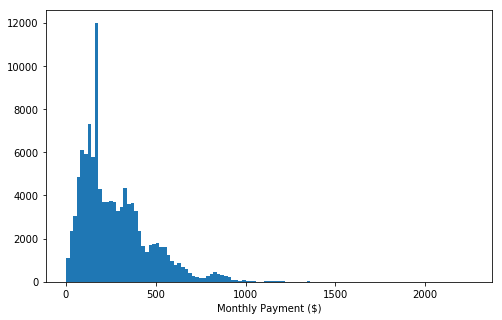

In [40]:
binsize = 20
bins = np.arange(0, prosper['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Payment ($)')
plt.show()

To get a clearer picture, let's check how many people pay more than $1500 monthly

In [41]:
prosper[prosper['MonthlyLoanPayment'] > 1500].count()

LoanOriginalAmount             22
BorrowerAPR                    22
BorrowerRate                   22
DebtToIncomeRatio              22
StatedMonthlyIncome            22
Term                           22
BorrowerState                  22
LoanOriginationDate            22
Occupation                     22
EmploymentStatus               22
MonthlyLoanPayment             22
Investors                      22
InvestmentFromFriendsCount     22
InvestmentFromFriendsAmount    22
Recommendations                22
IsBorrowerHomeowner            22
Month                          22
Quarter                        22
Year                           22
ListingCategory                22
CreditScore                    22
dtype: int64

22 out of over 110,000 borrowers, I will drop them as they are not likely to contribute to this analysis. Then re-plot the histogram

In [42]:
# drop rows with MonthlyLoanPayment > 1500
prosper = prosper[prosper['MonthlyLoanPayment'] < 1500]

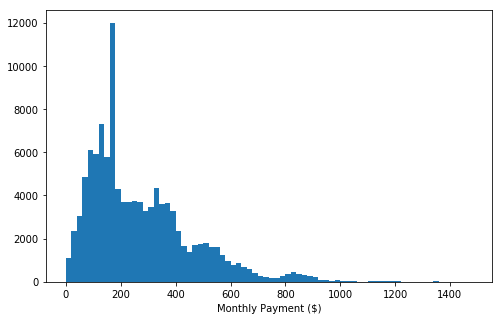

In [43]:
binsize = 20
bins = np.arange(0, prosper['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Payment ($)')
plt.show()

The distribution is multimodal with the highest peak at 200, a smaller one at 150 and another one at 350

The distribution of stated monthly income is next

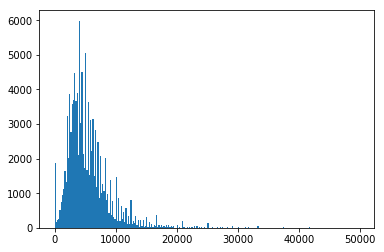

In [44]:
bins_smi = np.arange(0, 50000, 200)
plt.hist(data = prosper, x = 'StatedMonthlyIncome', bins=bins_smi);

The distribution is unimodal and right skewed with most values between 0 and 2000

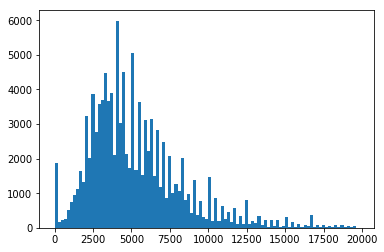

In [45]:
# Distribution of stated monthly income ranging from 0 to 2000
bins_smi = np.arange(0, 20000, 200)
plt.hist(data = prosper, x = 'StatedMonthlyIncome', bins=bins_smi);

This shows that the peak is 4,000. Stated monthly income of 30,000 and above are outliers, so need to be dropped

In [46]:
# check for StatedMonthlyIncome greater than $30000
prosper[prosper['StatedMonthlyIncome']>30000].count()

LoanOriginalAmount             318
BorrowerAPR                    318
BorrowerRate                   318
DebtToIncomeRatio              318
StatedMonthlyIncome            318
Term                           318
BorrowerState                  318
LoanOriginationDate            318
Occupation                     318
EmploymentStatus               318
MonthlyLoanPayment             318
Investors                      318
InvestmentFromFriendsCount     318
InvestmentFromFriendsAmount    318
Recommendations                318
IsBorrowerHomeowner            318
Month                          318
Quarter                        318
Year                           318
ListingCategory                318
CreditScore                    318
dtype: int64

In [47]:
# drop the rows in which StatedMonthlyIncome is greater than $30000
prosper = prosper[prosper['StatedMonthlyIncome'] <= 30000]

Now to the distribution of the Month, Quarter, Year and the state of the borrowers

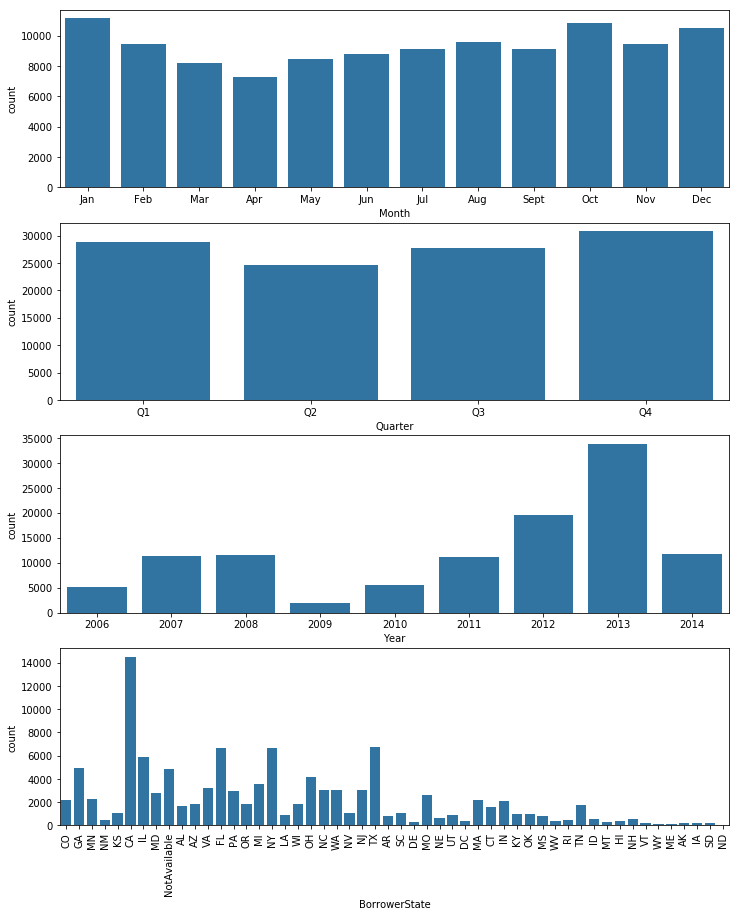

In [48]:
fig, ax = plt.subplots(nrows=4, figsize = [12,15])

default_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'Month', color = default_color, ax = ax[0])
sb.countplot(data = prosper, x = 'Quarter', color = default_color, ax = ax[1])
sb.countplot(data = prosper, x = 'Year', color = default_color, ax = ax[2])
sb.countplot(data = prosper, x = 'BorrowerState', color = default_color, ax = ax[3])
plt.xticks(rotation = 90)

plt.show()

January recorded the highest number of loans while the forth quarter takes the lead. I guess this might be due to the end of the year festivities. Also, Califonia takes the lead in BorrowerState, followed by Florida, New York and Texas. While Maine and Wyoming has the least number

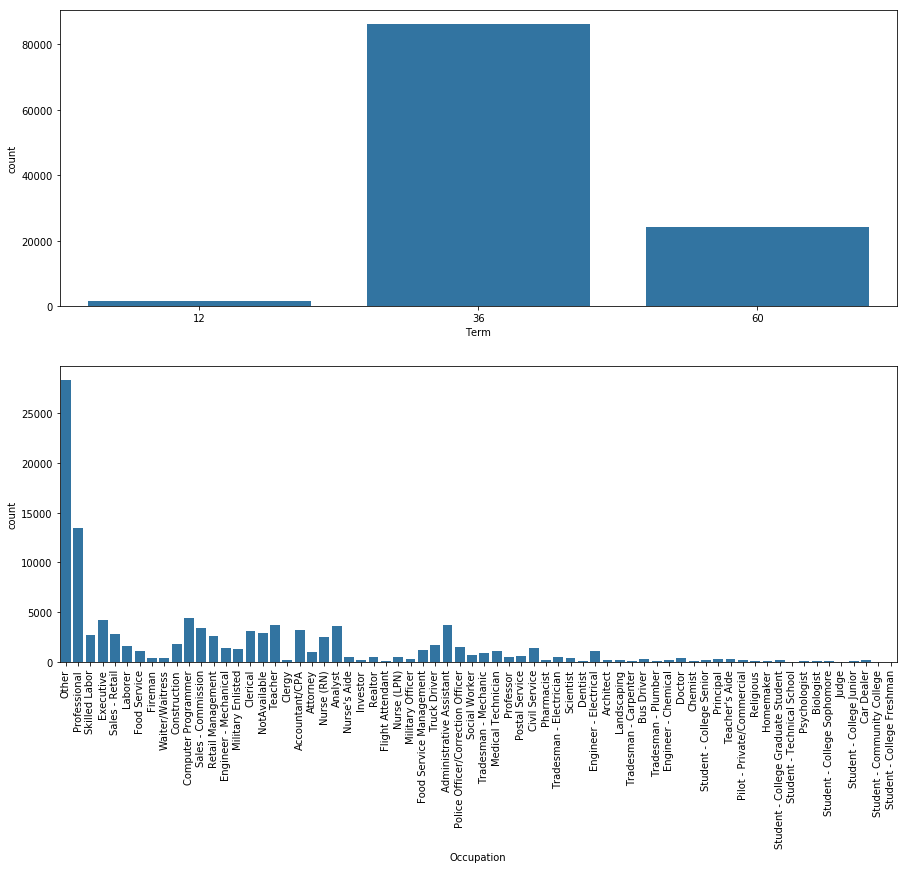

In [49]:
fig, ax = plt.subplots(nrows=2, figsize = [15,12])

default_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = prosper, x = 'Occupation', color = default_color, ax = ax[1])
plt.xticks(rotation = 90)

plt.show()

More than 25% of the borrowers selected **Other** as their occupation. Students in Technical School, Judge, Students in Community college and Fresh college Students has the least loan

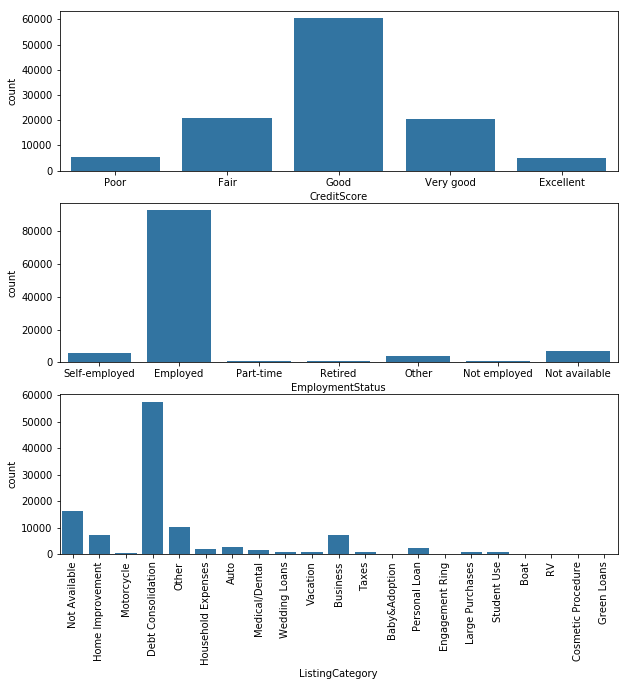

In [50]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'CreditScore', color = default_color, ax = ax[0])
sb.countplot(data = prosper, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = prosper, x = 'ListingCategory', color = default_color, ax = ax[2])
plt.xticks(rotation = 90)

plt.show()

50% of the borrower have a good credit score, 70% are employed or have a full-time job and 50% of the loans are for debt consolidation

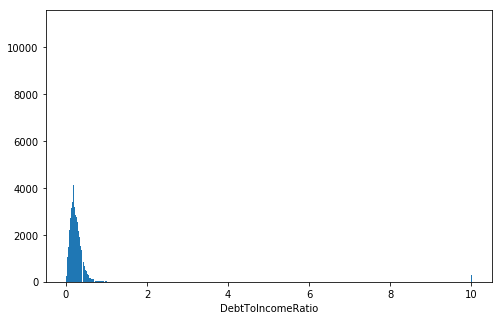

In [51]:
# distribution of DebtToIncomeRatio,
bins = np.arange(0,prosper['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio');

In [52]:
prosper[prosper['DebtToIncomeRatio'] > 1.0].count()

LoanOriginalAmount             795
BorrowerAPR                    795
BorrowerRate                   795
DebtToIncomeRatio              795
StatedMonthlyIncome            795
Term                           795
BorrowerState                  795
LoanOriginationDate            795
Occupation                     795
EmploymentStatus               795
MonthlyLoanPayment             795
Investors                      795
InvestmentFromFriendsCount     795
InvestmentFromFriendsAmount    795
Recommendations                795
IsBorrowerHomeowner            795
Month                          795
Quarter                        795
Year                           795
ListingCategory                795
CreditScore                    795
dtype: int64

Most of the values are between 0 and 1 with only 795, which amount to 0.71% of the dataset

In [53]:
# drop rows with DebtToIncomeRatio > 1.0
prosper = prosper[prosper['DebtToIncomeRatio'] <= 1.0]

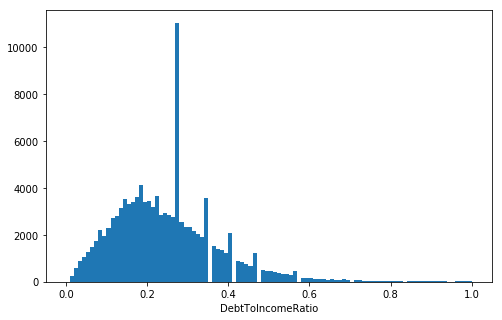

In [54]:
# re-plot distribution of DebtToIncomeRatio,
bins = np.arange(0,prosper['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio');

The distribution is unimodal and  right skewed with a high spike at 0.25. Showing that 10% of the borrowers has a debt-to-income ratio of 0.25

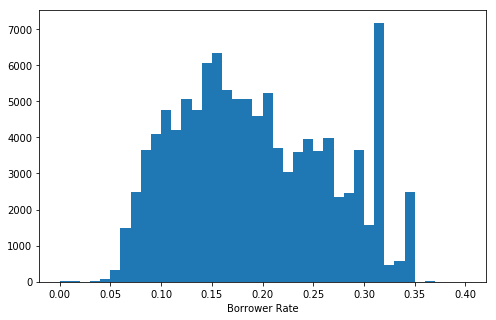

In [55]:
bins = np.arange(0, prosper.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');

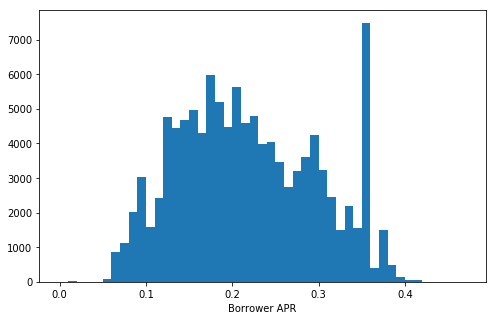

In [56]:
bins = np.arange(0, prosper.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

The distribution looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.4.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal and most of the values are at the range of 0.05 and 0.4. Same goes for the Borrower rate where most of the values are between 0.05 and 0.35. There are no unusual points and no need to perform any transformations.

> Also, the distributions of stated monthly income is highly right screwed. DebtToIncomeRatio is also right skewed. There is no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 22 out of over 110,000 borrowers have MonthlyLoanPayment of over 1500, I had to drop them.

> Stated monthly income has few values above 30,000. These were outliers, so need to be dropped

> 795 rows have values greater than 1 in DebtToIncomeRatio, since this amounts to 0.71%, it is less likely to affect our analysis, also any conclusion reached for values between 0 and 1 can be generalized to include values above 1.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [57]:
num_vars1 = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'BorrowerAPR', 
                'BorrowerRate']
num_vars2 = ['LoanOriginalAmount', 'Recommendations', 'InvestmentFromFriendsAmount', 'InvestmentFromFriendsCount', 'Investors']
cat_vars1 = ['Term', 'Quarter', 'CreditScore', 'EmploymentStatus']
cat_vars2 = ['ListingCategory', 'IsBorrowerHomeowner', 'BorrowerState', 'Year']

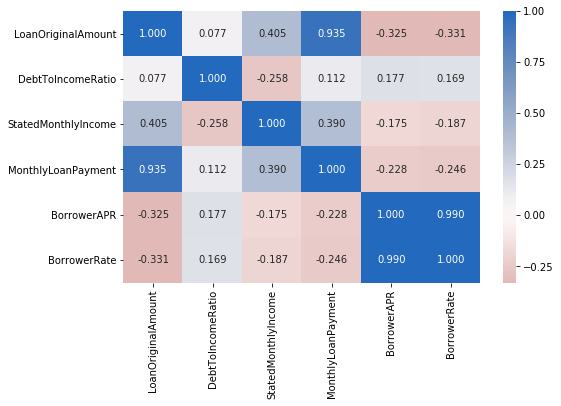

In [58]:
plt.figure(figsize = [8, 5])
sb.heatmap(prosper[num_vars1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Loan amount seem not to depend on the debt-to-income ratio, as the correlation is almost zero. Positive correlation between Loan amount and Monthly income was as expected. Also, debt-to-income ratio and monthly income have a negative correlation.

Interestingly, there is almost a perfect correlation between Loan amount and Monthly loan payment. Borrower APR and Rate both have a negative correlation with Loan amount, and surprisingly, the correlation coefficient is almost the same. Since the correlation coefficient between APR and rate is 0.99, I will use them interchangeably. 

Another interesting fact is that debt-to-income ratio has a negative correlation with Monthly income.

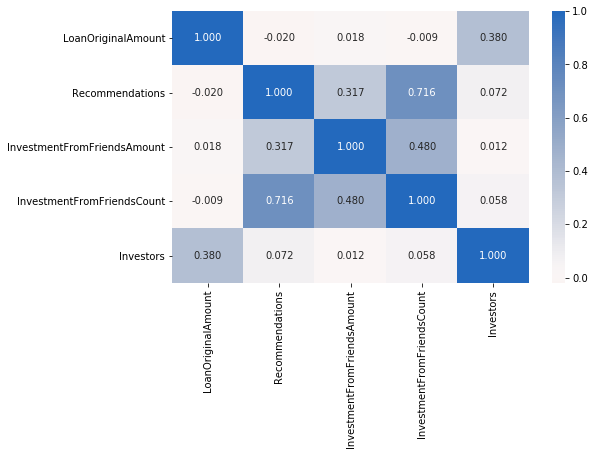

In [59]:
plt.figure(figsize = [8, 5])
sb.heatmap(prosper[num_vars2].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As expected, there is a positive correlation between Recommendations and Investment from friends. Most variables in num_var2 does not affect loan amount except for the Investor

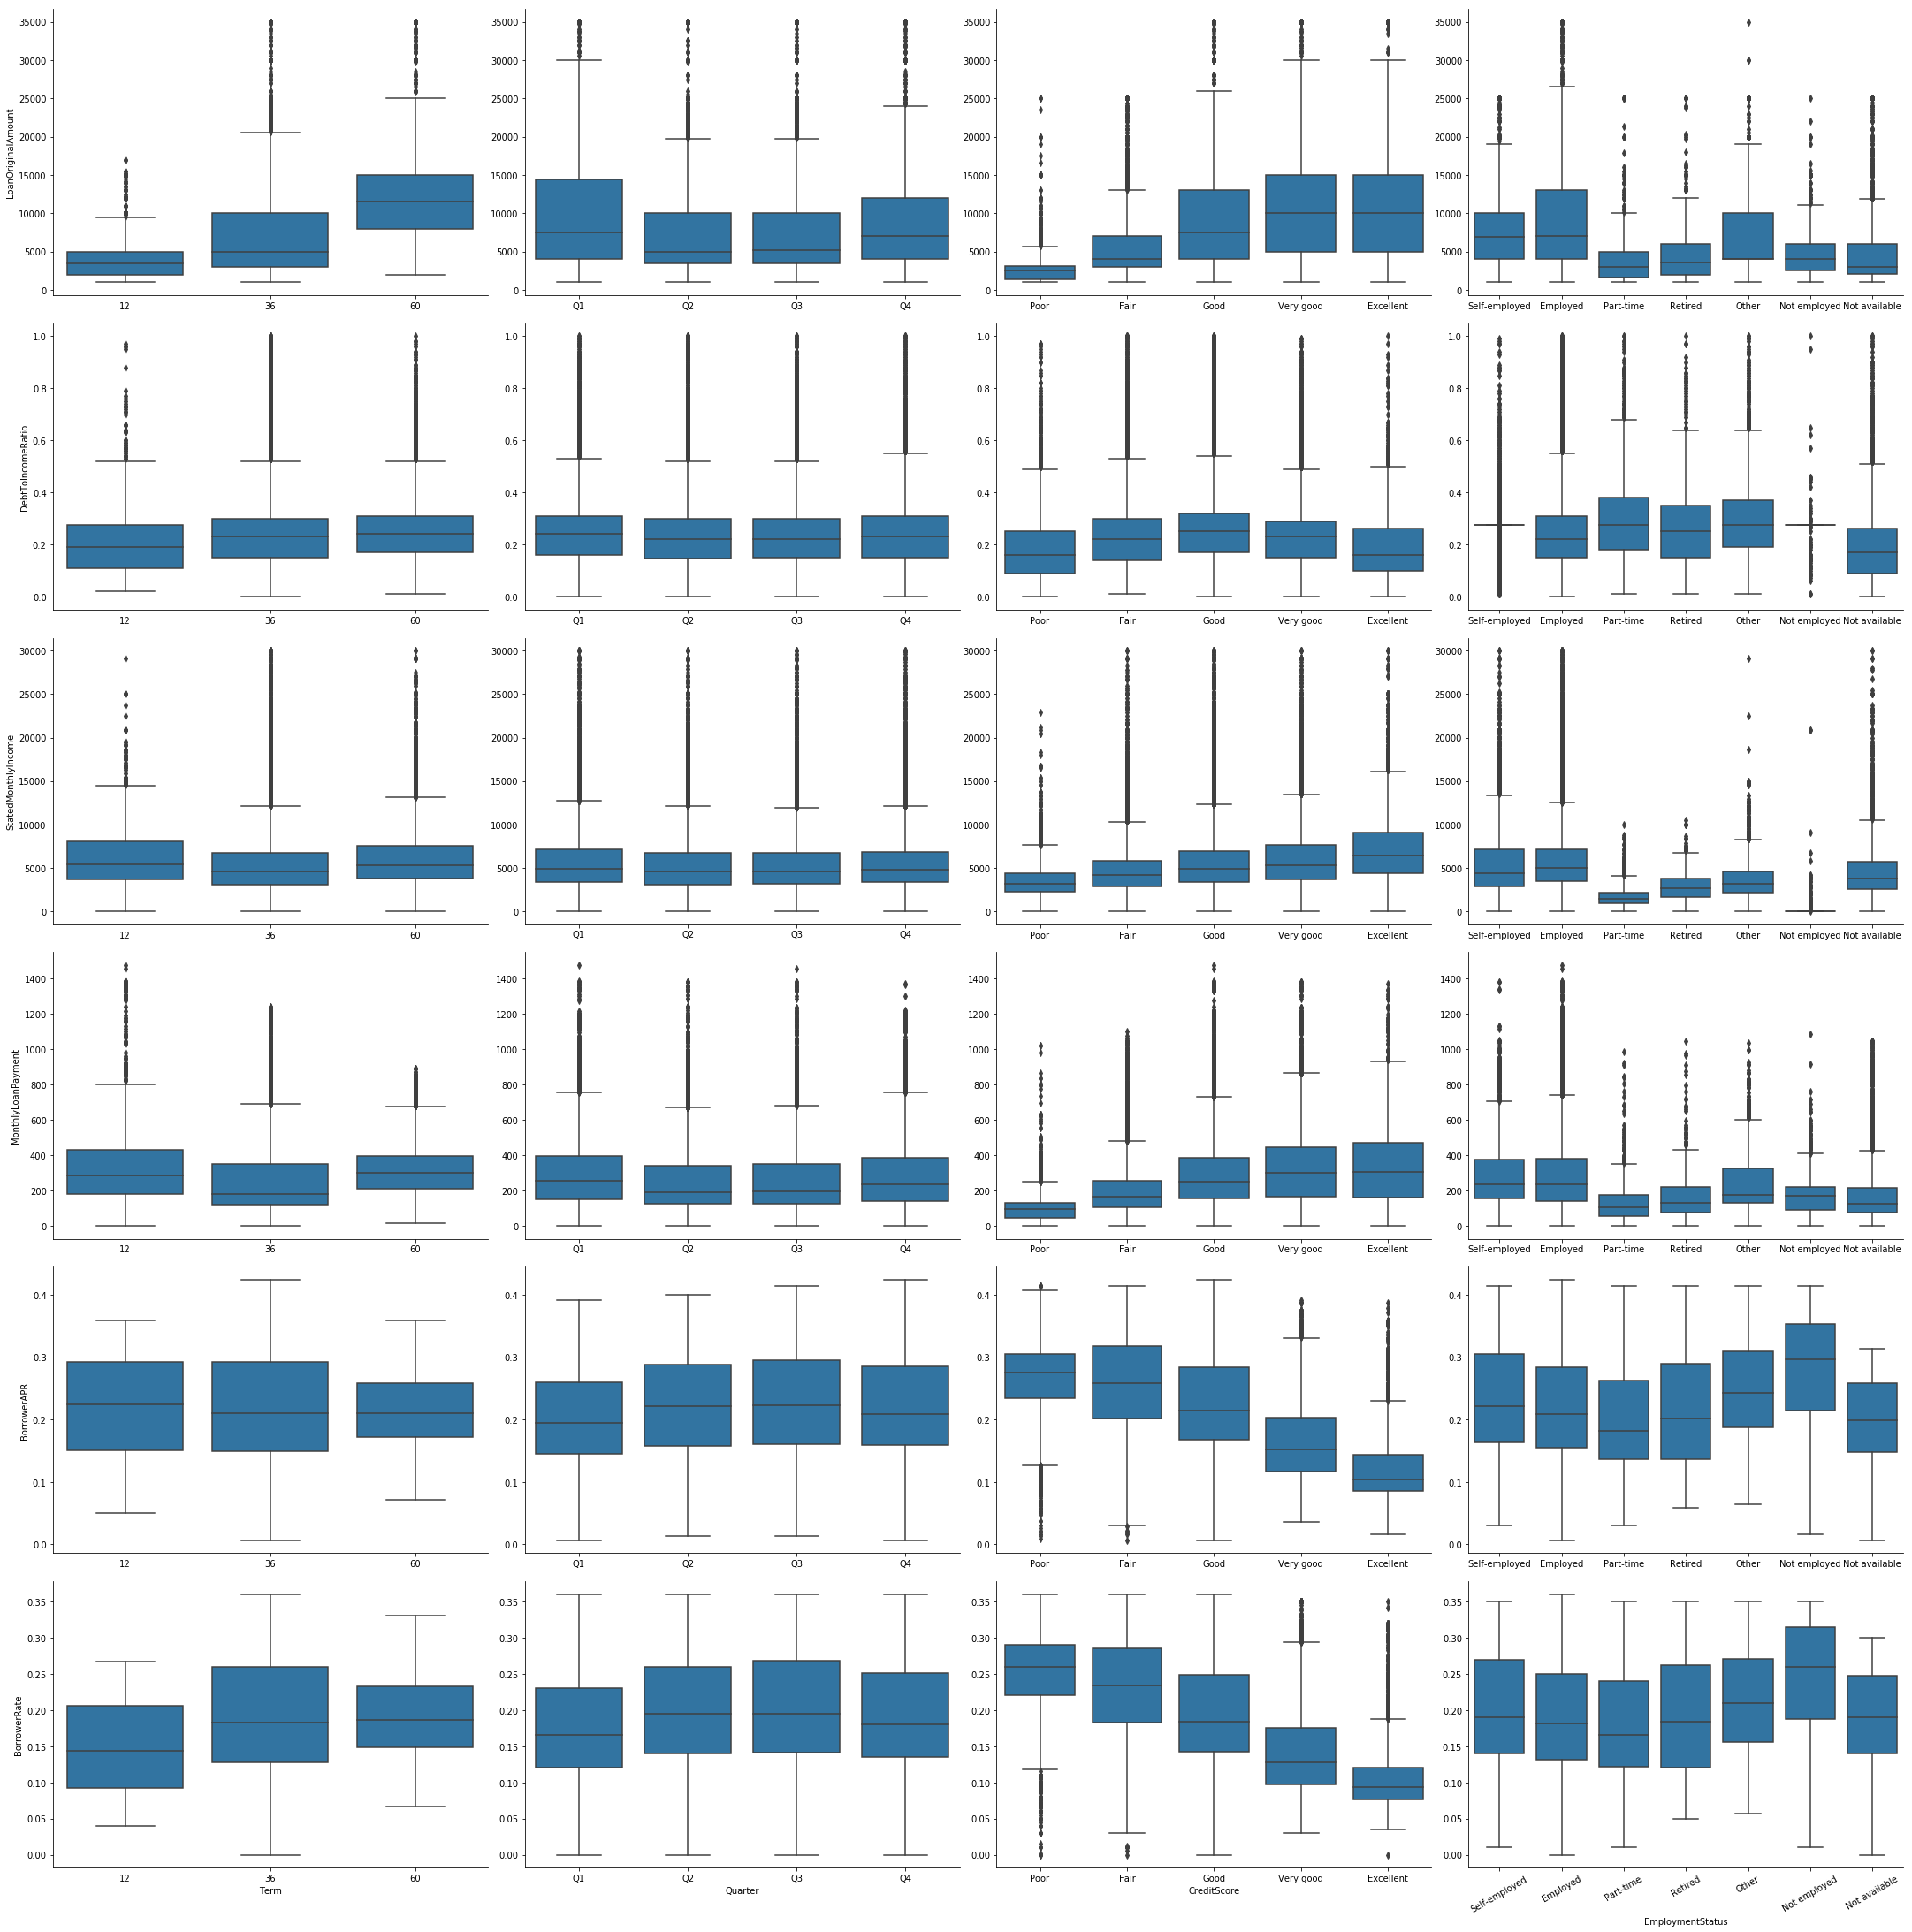

In [61]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = prosper, y_vars = num_vars1, 
                x_vars = cat_vars1, size = 5, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The loan amount increases with increase in term. The first quarter has the highest loan amount, followed by the fourth quarter while the remaining two are almost equal. Loan amount increases with better credit score. Self-employed and employed took the lead in loan amount while part-time comes last.

Stated monthly income as well as Monthly loan payment increases with better credit score. As expected, Unemployed borrowers have the least monthly income followed by borrowers with part-time job while self-employed and employed top the chart. Borrowers with part-time job have the least monthly loan payment.

Borrower APR and Rate drops with better credit score. Unemployed borrowers has the higher APR while those on part-time job has the highest

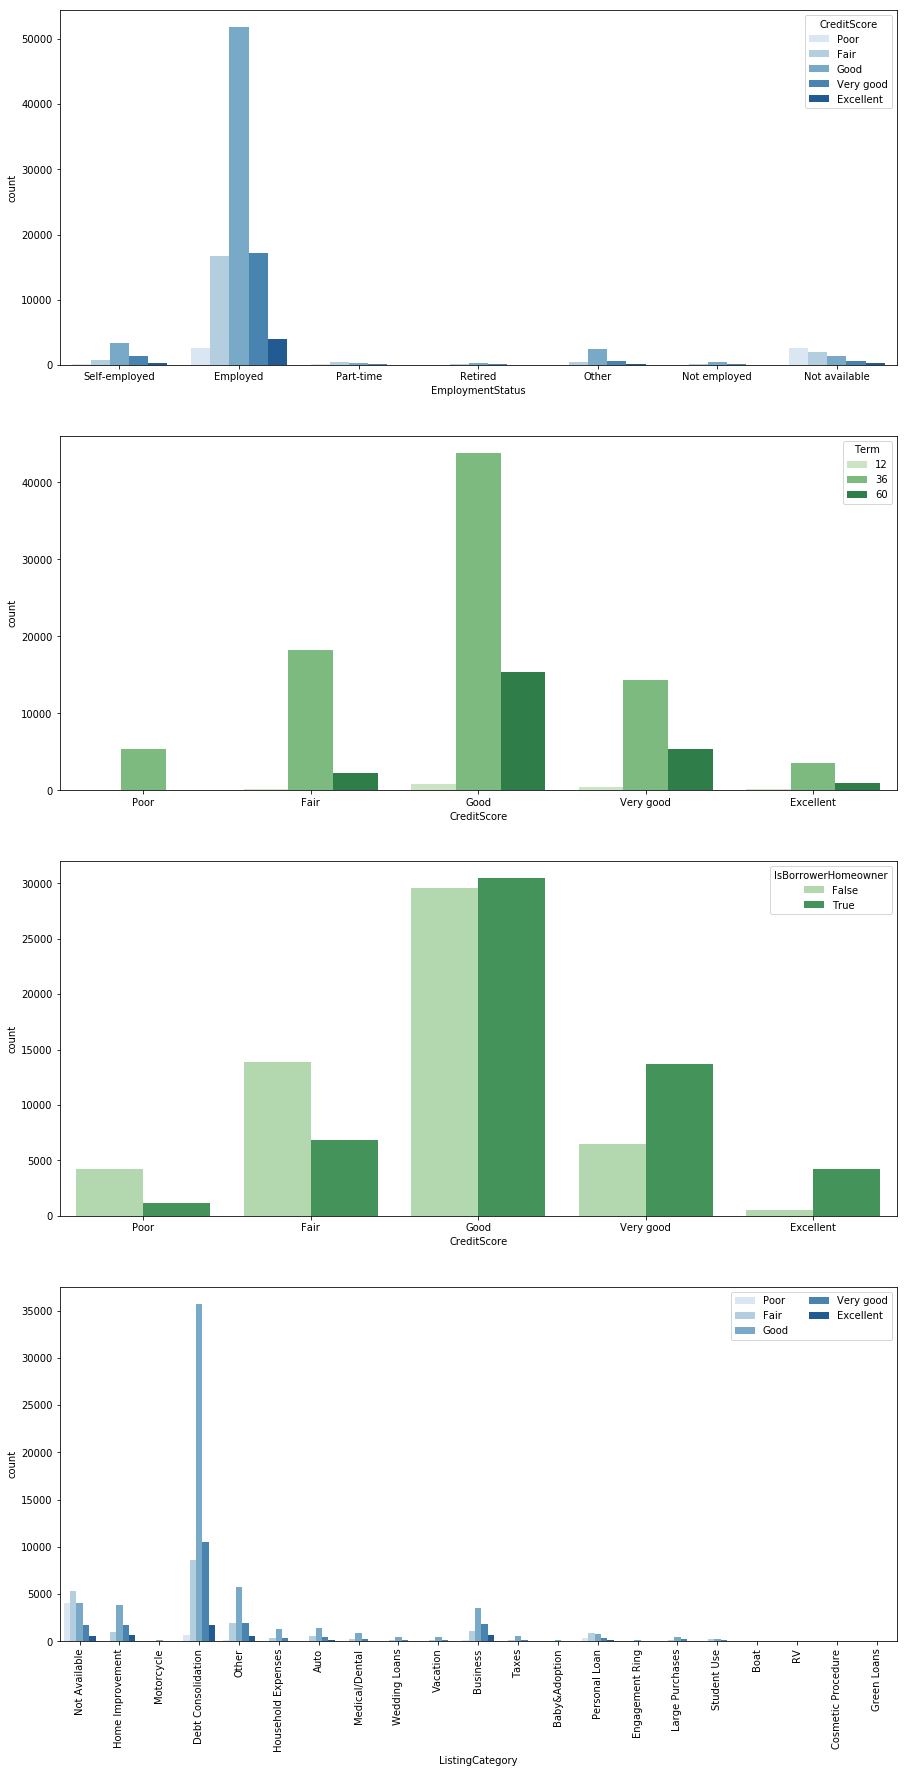

In [63]:
# comparing the categorical variables
plt.figure(figsize = [15, 30])

# subplot 1: EmploymentStatus vs CreditScore
plt.subplot(4, 1, 1)
sb.countplot(data = prosper, x = 'EmploymentStatus', hue = 'CreditScore', palette = 'Blues')

# subplot 2: CreditScore vs Term
plt.subplot(4, 1, 2)
sb.countplot(data = prosper, x = 'CreditScore', hue = 'Term', palette = 'Greens')

# subplot 3: CreditScore vs IsBorrowerHomeowner
plt.subplot(4, 1, 3)
sb.countplot(data = prosper, x = 'CreditScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')

# subplot 4: ListingCategory vs. CreditScore
ax = plt.subplot(4, 1, 4)
sb.countplot(data = prosper, x = 'ListingCategory', hue = 'CreditScore', palette = 'Blues')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 90)

plt.show()

More of employed borrowers has a minimum of good credit score. Higher credit scores have more home owners.

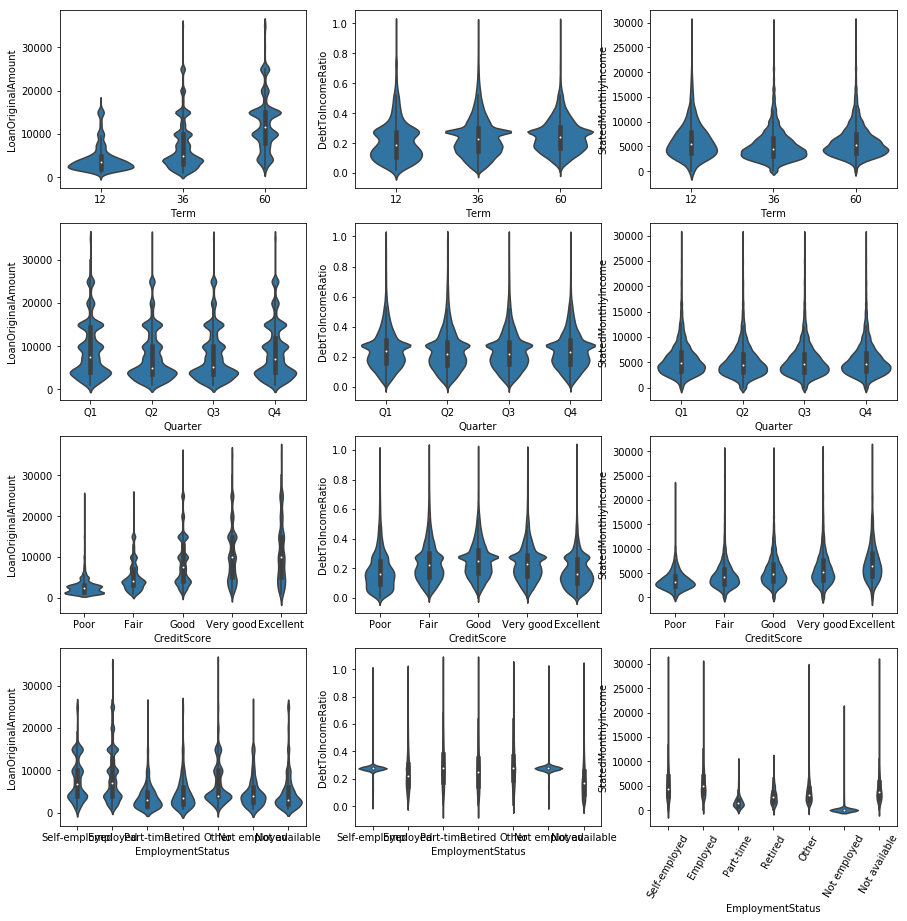

In [64]:
# plot the categorical variables against LoanOriginalAmount, DebtToIncomeRatio and StatedMonthlyIncome again using violin plot
fig, ax = plt.subplots(ncols = 3, nrows = 4 , figsize = [15,15])

for i in range(len(cat_vars1)):
    var = cat_vars1[i]
    sb.violinplot(data = prosper, x = var, y = 'LoanOriginalAmount', ax = ax[i,0],
               color = default_color)
    sb.violinplot(data = prosper, x = var, y = 'DebtToIncomeRatio', ax = ax[i,1],
               color = default_color)
    sb.violinplot(data = prosper, x = var, y = 'StatedMonthlyIncome', ax = ax[i,2],
               color = default_color)
    plt.xticks(rotation = 60)

plt.show()

The plot shows that more of loans with higher amount are awarded with longer with longer term. Also, borrowers with higher credit score have access to higher loan amount. Self-employed and employed borrowers have access to higher loan amount part-time, retired and unemployed borrowers have access to more of lesser amount of loan. And as expected, Unemployed borrowers has the least monthly income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan amount seem to be independent of depend on the debt-to-income ratio, but has a positive correlation with monthly income, as expected. It also has a high positive correlation with Monthly loan payment. APR and Borrower rate have a correlation of 0.99, and they both have a negative correlation with loan amount.

> The higher the loan amount the longer the term of payment. Loan amount, also, increases with better credit score. Self-employed and employed borrowers have access to higher loan amount part-time, retired and unemployed borrowers have access to more of lesser amount of loan.

>Borrowers with better credit score have higher Stated monthly income as well as Monthly loan payment. Borrower APR and Rate also drop with better credit score. More of employed borrowers have a minimum of good credit score. Borrowers with minimum of good credit score have more home owners than non-home owners


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The higher the Monthly income, the lower the debt-to-income ratio.
Unemployed borrowers has the higher APR

<a id='mjultivariate'></a>
## Multivariate Exploration

> In this section, I will create plots of three or more variables to investigate the ProsperLoanData even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

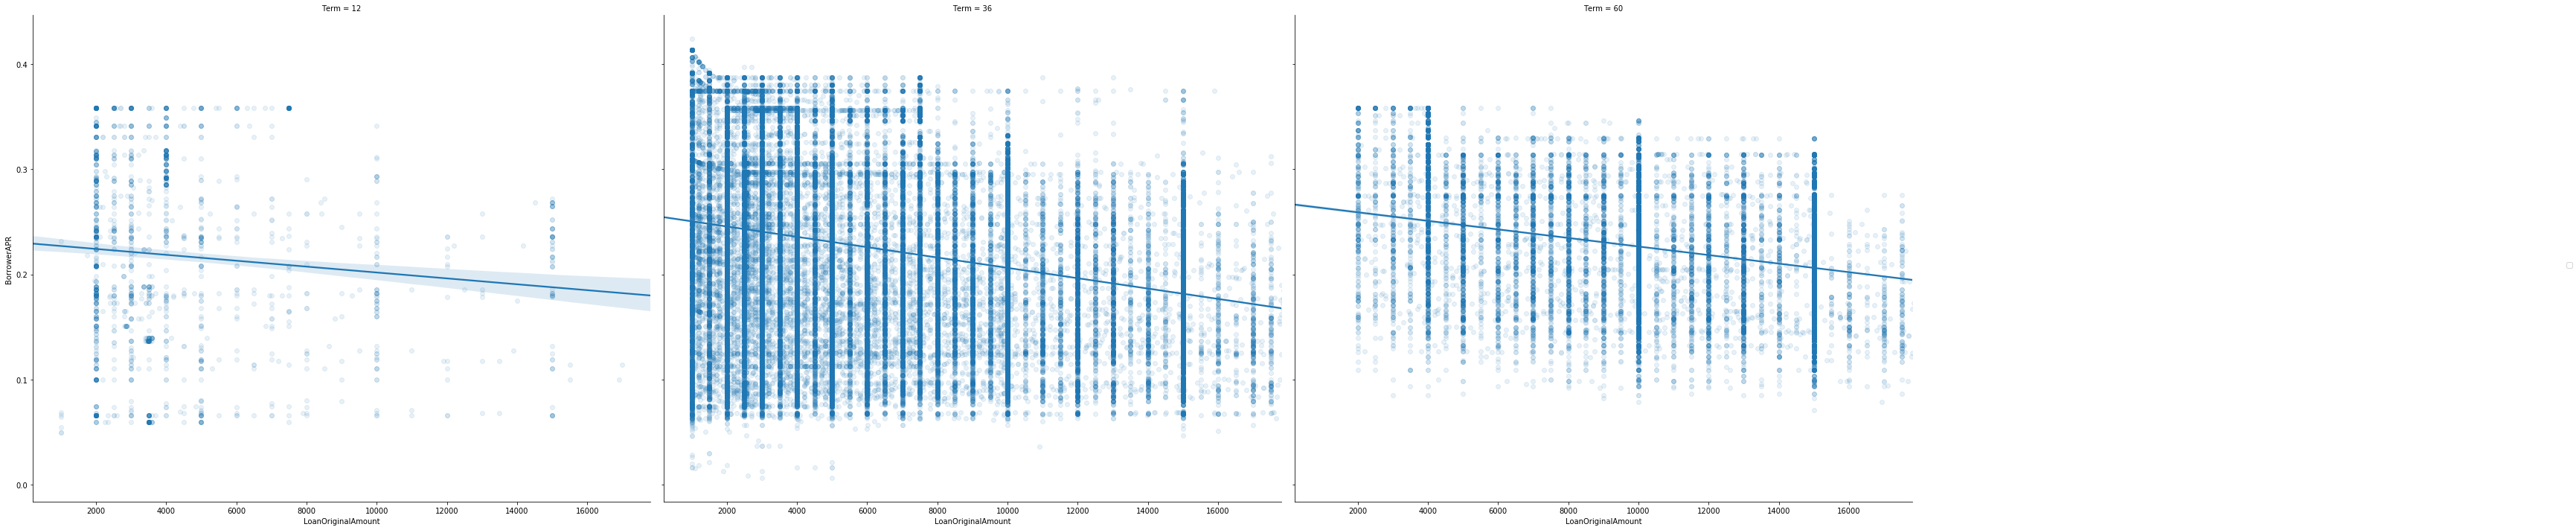

In [65]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= prosper, aspect=1.2, size=10, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Irrespective of the term of loan, APR maintains a negative slop with loan amount

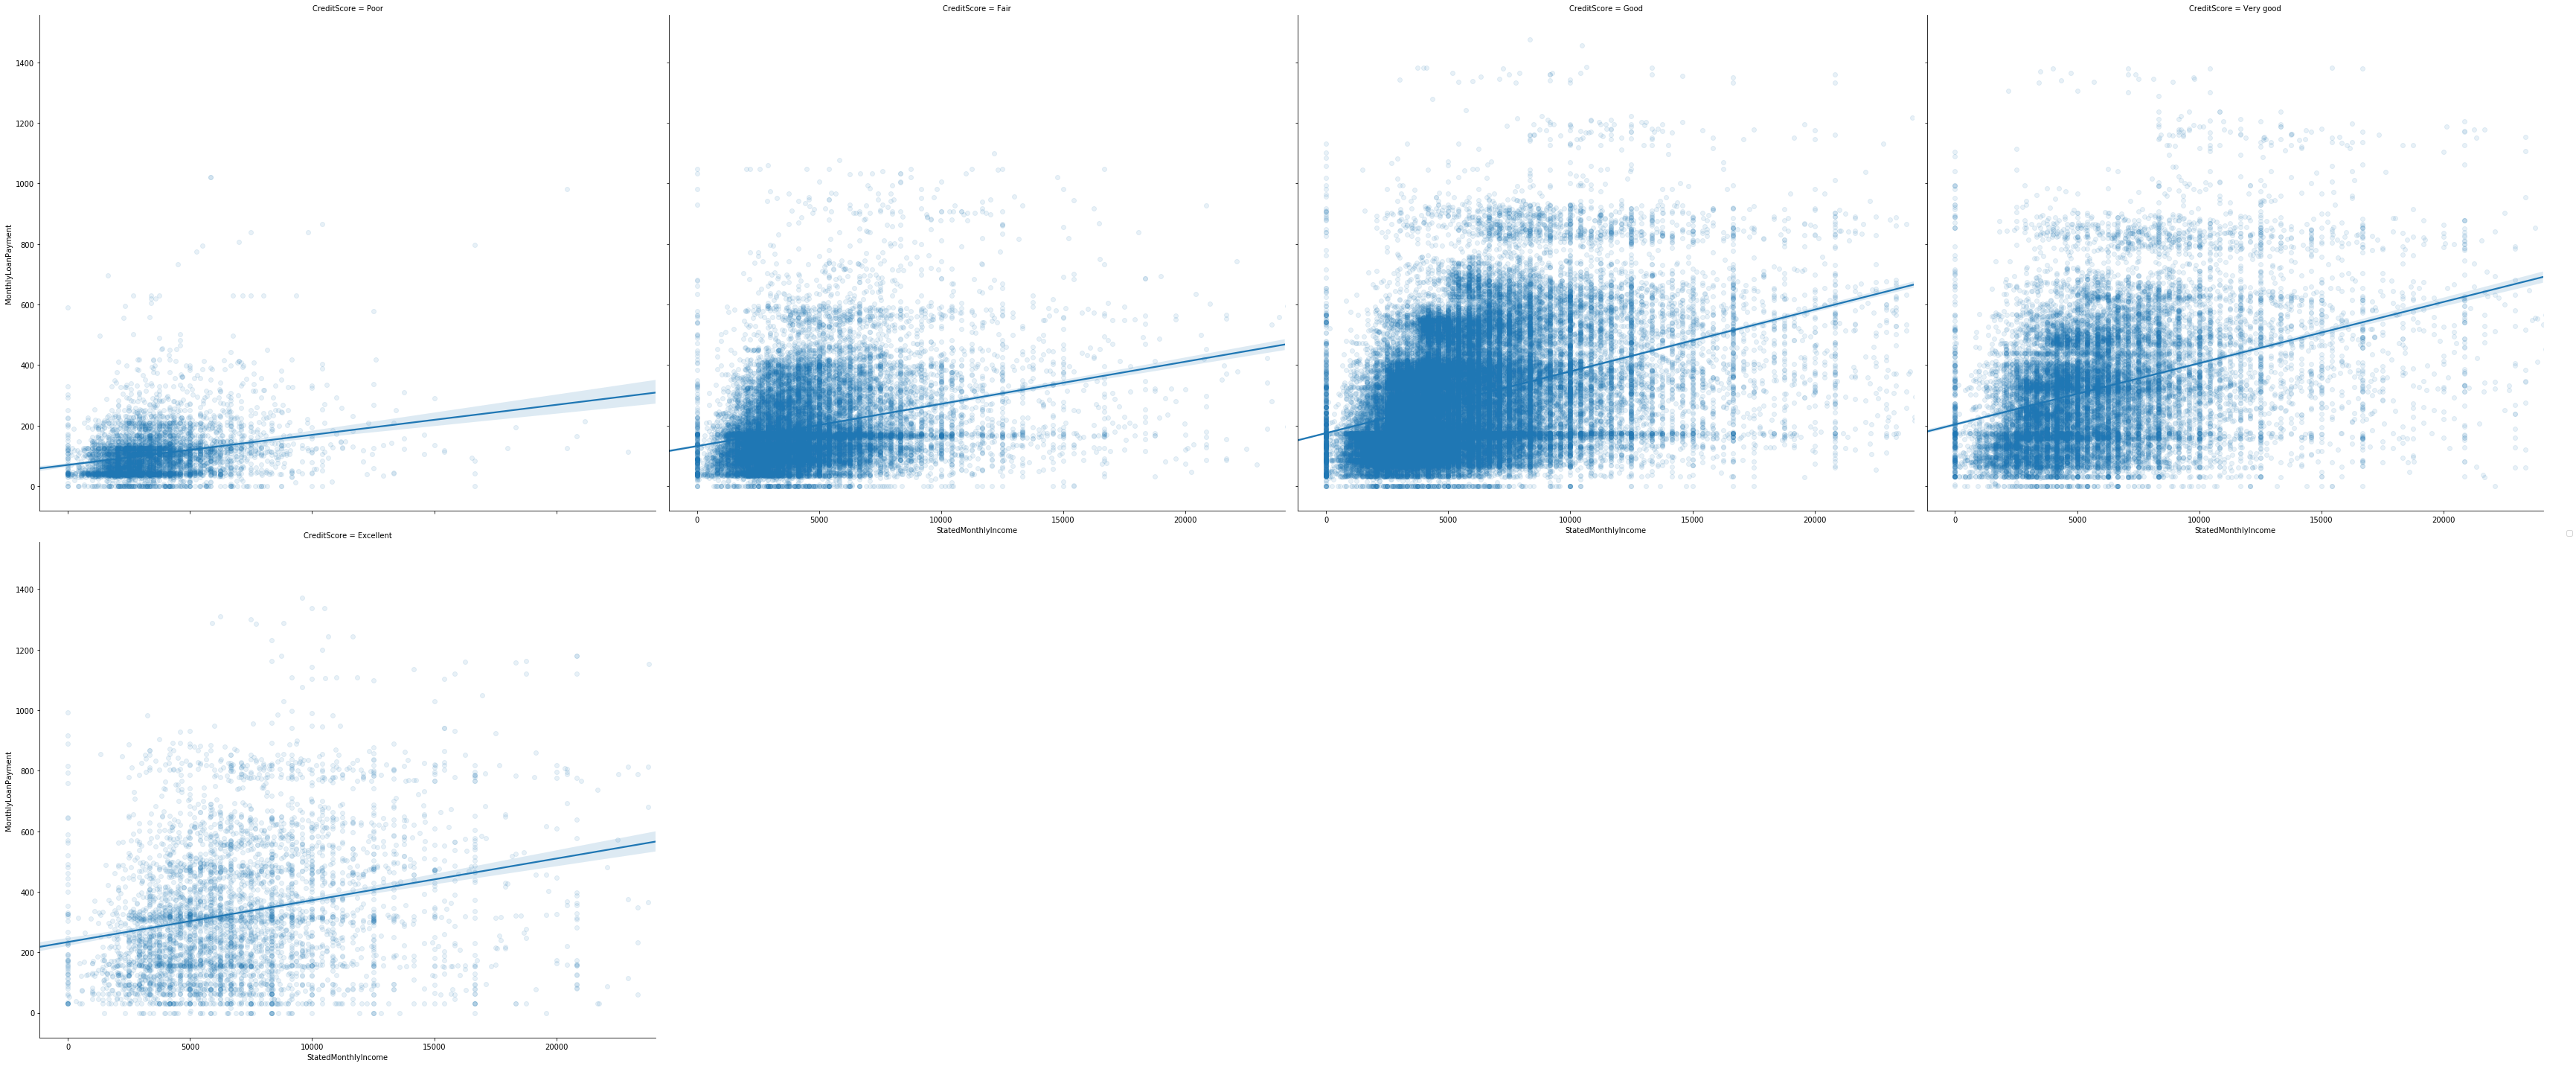

In [66]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= prosper, aspect=1.2, size=10, col='CreditScore', col_wrap=4)
g.map(sb.regplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Monthly income and Monthly loan payment maintain positive slopes for all credit scores. Although, Good, Very good and Excellent credit scores have stronger relationship

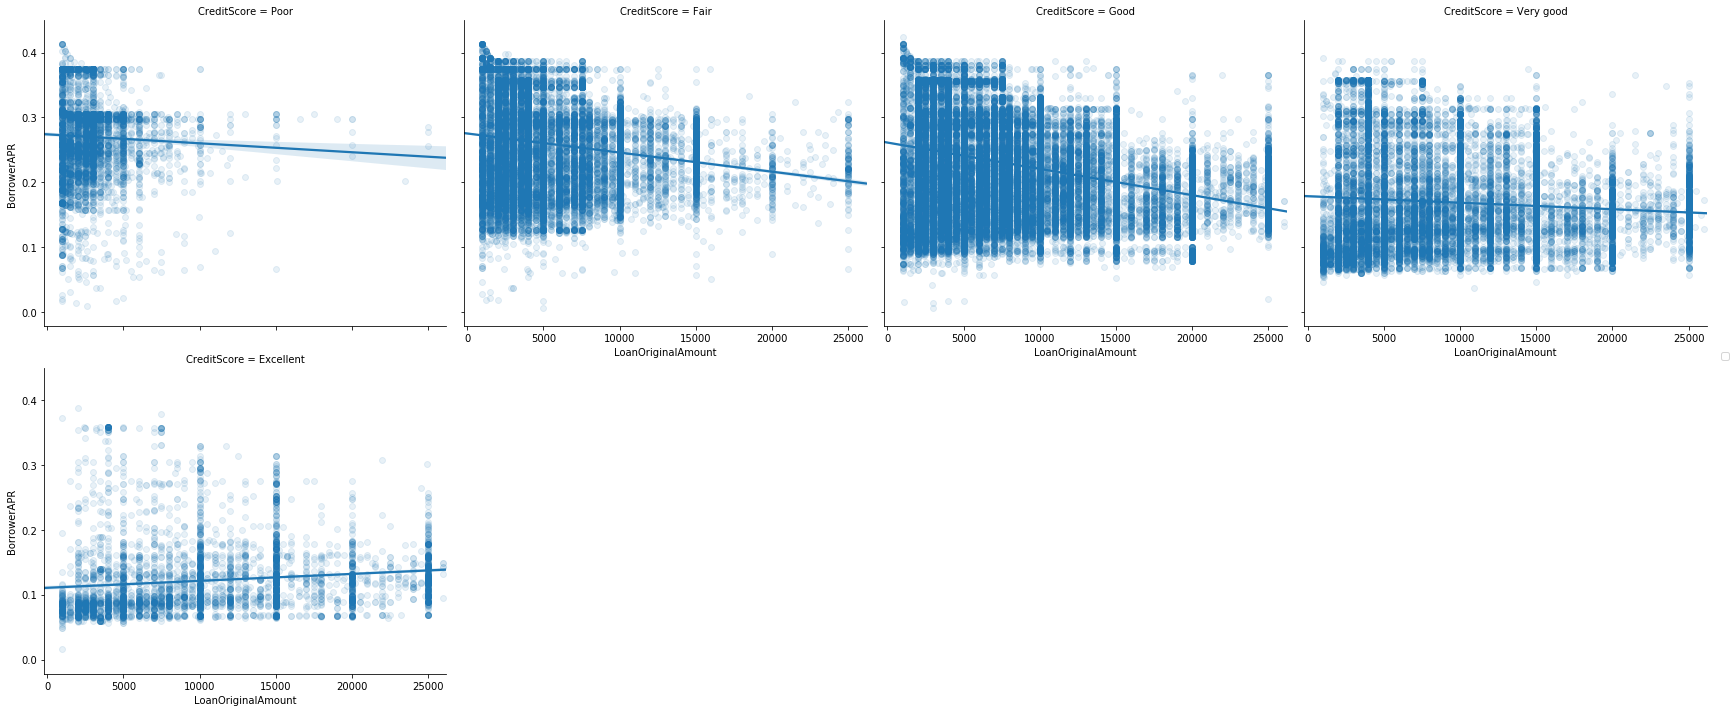

In [67]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=prosper, aspect=1.2, size=5, col='CreditScore', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The relationship between loan amount and APR changes from negative to slightly positive if the borrower has an excellent credit score.

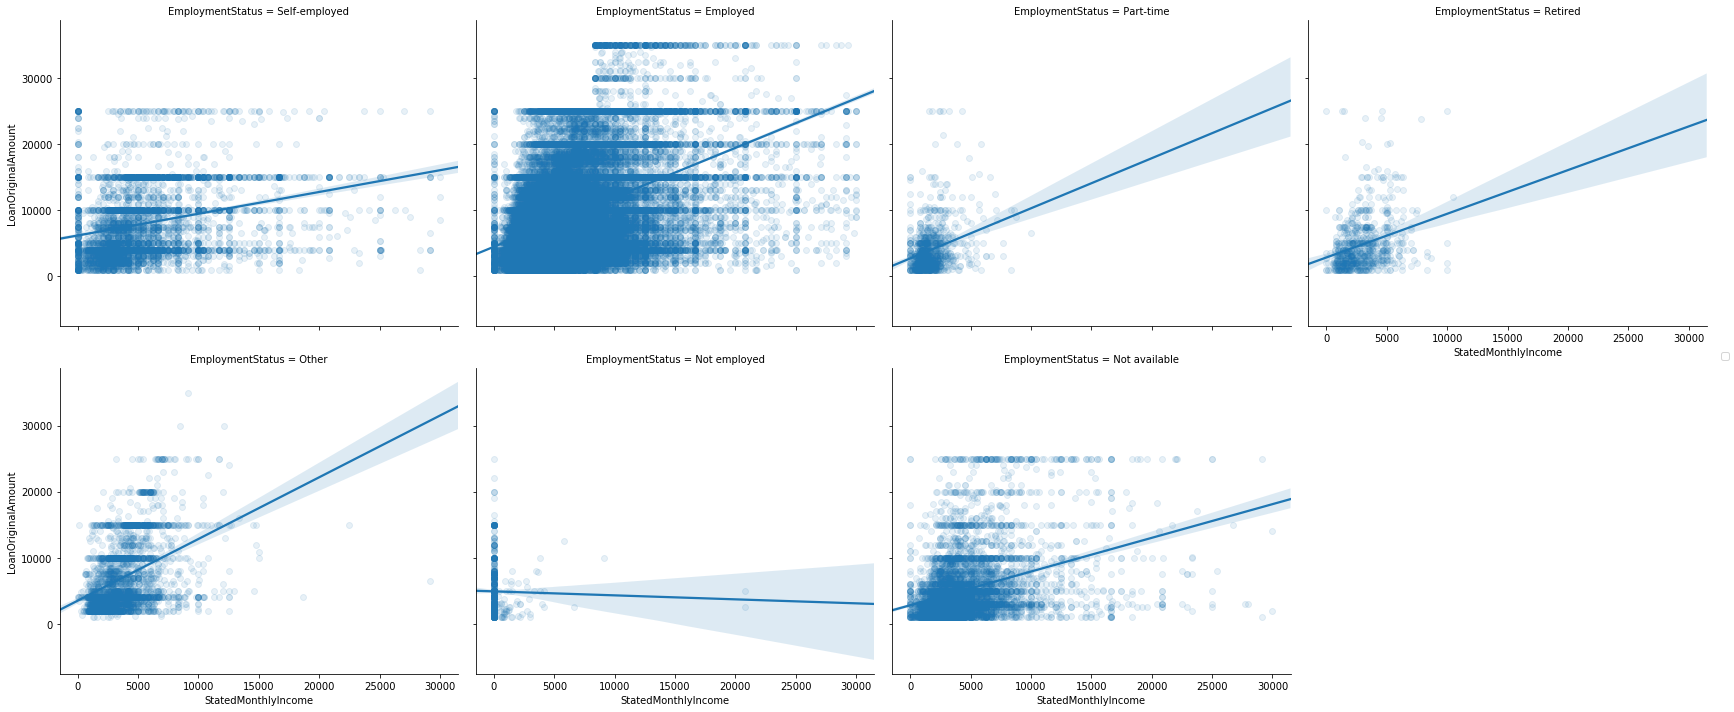

In [68]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=prosper, aspect=1.2, size=5, col='EmploymentStatus', col_wrap=4)
g.map(sb.regplot, 'StatedMonthlyIncome', 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

All employment status show a positive slope between Loan amount and Monthly income except Unemployed which maintained a slightly negative relationship. Employed and Other have a very strong positive relationship.

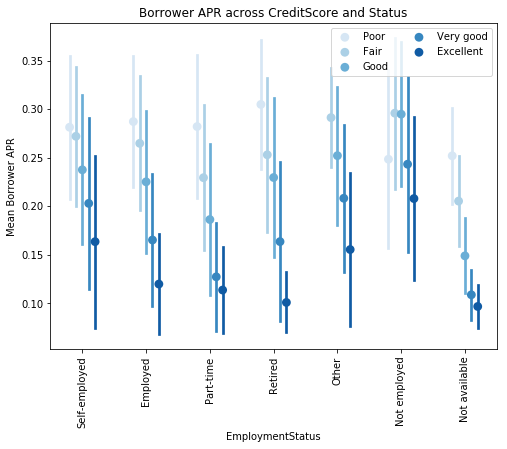

In [69]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = prosper, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'CreditScore',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across CreditScore and Status')
plt.ylabel('Mean Borrower APR')
ax.legend(loc = 1, ncol = 2)
ax.set_yticklabels([],minor = True)
plt.xticks(rotation = 90);

APR drops as the credit score improves for all employment statuses. Borrowers whose employment status is 'Not available' has the lowest APR, 'Not employed' has the highest except for those with Poor credit score and Retired Borrowers with Poor credit score have the highest APR

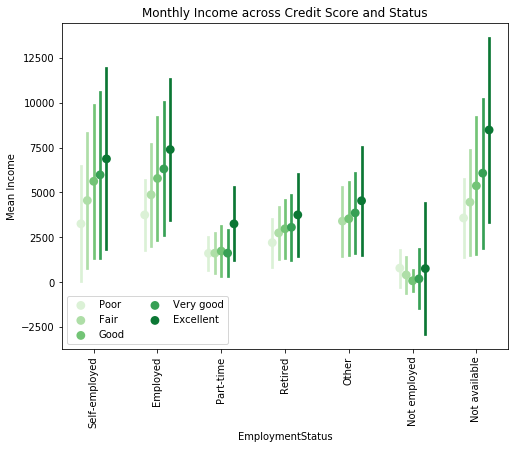

In [70]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = prosper, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'CreditScore',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Monthly Income across Credit Score and Status')
plt.ylabel('Mean Income')
ax.set_yticklabels([],minor = True);
ax.legend(ncol = 2)
plt.xticks(rotation = 90);

StatedMonthlyIncome increases with better credit score across all employment status except for 'Not employed' where the distribution pattern fluctuates
Also, it seems most borrowers who have decided not to share their employment status earn well.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrowers with higher credit score seem to earn more and pay more loans per month.

> APR drops as the credit score improves for all employment statuses. 'Not employed' borrowers has the highest APR except for those with Poor credit score. Retired Borrowers with Poor credit score have the highest APR
> StatedMonthlyIncome increases with better credit score across all employment status, although, it seems not to follow for 'Not employed' as the pattern fluctuates. Also, it seems most borrowers who have decided not to share their employment status earn well.

> The higher the APR, the lower the loan amount and vice versa. This only changes when the borrower has a credit score of 800 and above.

> All employment status shows a positive slope between Loan amount and Monthly income except Unemployed which maintained a slightly negative relationship. Employed and Other have a very strong positive relationship.


### Were there any interesting or surprising interactions between features?

> DebtToIncomeRatio seem to have little of no effect on both the BorrowerAPR and LoanOriginalAmount

<a id='conclusion'></a>
## Conclusions
> In conclusion, some of the major determinants of loan amount seem to be the Borrower credit score, APR and Rate.

> While higher credit score goes with higher amount, the reverse is the case for both Borrower APR and Rate

> Credit score seem to largely depend on both employment status and monthly income, as self-employed and employed/full-time borrowers have better credit scores and borrowers with higher monthly income has higher credit scores


In [71]:
# save the cleaned dataset for explanatory data analysis
prosper.to_csv('prosperLoan_cleaned.csv', index=False)

# We save our data in a pickle format not to lose pandas types definitions in a text csv file.
prosper.to_pickle("./prosperLoan_cleaned.pkl")

In [72]:
# Read clean data
# prosper = pd.read_csv('prosperLoan_cleaned.csv')

prosper = pd.read_pickle("./prosperLoan_cleaned.pkl")